In [1]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/screener_sbanalysis_api/"
]

In [2]:
sys.path += paths


In [3]:
# !pip install elasticsearch-dsl

In [4]:
# !pip install psycopg2-binary

In [5]:

from pandas.io import sql as psql

In [6]:
from lib.static_db import PgsqlExecutor

In [7]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "postgres",
        "credentials": "DqR567Q1",
        "database": "modelresearch"
      }

In [8]:
db = PgsqlExecutor(research_db)

In [9]:
sql = """

select * from dcf_values order by symbol, fiscal_year, created desc
"""
data = db.get_dataframe(sql)
data.head()

id     symbol  is_active  current_price  market_growth_rate  \
0  26672  000714968          0       161.2000               0.095   
1  26690  000714968          0       198.4600               0.095   
2  26810        02Z          1         4.4400               0.095   
3  26845        02Z          1         1.6028               0.095   
4  26841  035612177          0            NaN               0.095   

   current_growth_rate  fiscal_year  market_dcf    dcf  \
0                  NaN       2018.0         NaN    NaN   
1                  NaN       2019.0         NaN    NaN   
2                0.691       2018.0        10.4   35.0   
3                0.928       2020.0        25.7  118.4   
4                  NaN       2018.0         NaN    NaN   

                                               error  \
0  run failed: 000714968 single positional indexe...   
1  run failed: 000714968 single positional indexe...   
2                                                      
3                                                      
4  run failed: 035612177 local variable 'beta' re...   

                     created  
0 2020-06-05 21:02:09.746185  
1 2020-06-05 21:02:37.021478  
2 2020-06-05 21:04:47.596224  
3 2020-06-05 21:05:26.920278  
4 2020-06-05 21:05:22.166095

In [12]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [13]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1)
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)


In [14]:
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  22975   AACG          1         6.4234               0.095   
1  20249   AACG          1         3.7152               0.095   
2  12062   AACG          1         4.6200               0.095   
3  14797   AACG          1         0.9200               0.095   
4  14788   AACG          1         0.9200               0.095   

   current_growth_rate  fiscal_year  market_dcf     dcf  \
0               -0.062       2015.0        16.3 -1893.6   
1                0.126       2016.0        14.2    15.2   
2               -0.238       2017.0        11.9    48.3   
3               -5.302       2018.0        14.8     0.0   
4               -5.302       2018.0        14.8     0.0   

                                               error  \
0  missing tax rate: single positional indexer is...   
1  missing tax rate: single positional indexer is...   
2  missing tax rate: single positional indexer is...   
3  missing tax rate: single positional indexer is...   
4  missing tax rate: single positional indexer is...   

                     created last_symbol  last_price  last_growth_rate  \
0 2020-06-04 23:19:37.003876         NaN         NaN               NaN   
1 2020-06-04 21:27:50.433944        AACG      6.4234            -0.062   
2 2020-06-04 15:13:33.354444        AACG      3.7152             0.126   
3 2020-06-04 17:21:39.041568        AACG      4.6200            -0.238   
4 2020-06-04 17:21:05.737776        AACG      0.9200            -5.302   

   last_fiscal_year  last_market_dcf  last_dcf  
0               NaN              NaN       NaN  
1            2015.0             16.3   -1893.6  
2            2016.0             14.2      15.2  
3            2017.0             11.9      48.3  
4            2018.0             14.8       0.0

In [15]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1
data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]





In [16]:
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  22975   AACG          1         6.4234               0.095   
1  20249   AACG          1         3.7152               0.095   
2  12062   AACG          1         4.6200               0.095   
3  14797   AACG          1         0.9200               0.095   
4  14788   AACG          1         0.9200               0.095   

   current_growth_rate  fiscal_year  market_dcf     dcf  \
0               -0.062       2015.0        16.3 -1893.6   
1                0.126       2016.0        14.2    15.2   
2               -0.238       2017.0        11.9    48.3   
3               -5.302       2018.0        14.8     0.0   
4               -5.302       2018.0        14.8     0.0   

                                               error  ... last_dcf  \
0  missing tax rate: single positional indexer is...  ...      NaN   
1  missing tax rate: single positional indexer is...  ...  -1893.6   
2  missing tax rate: single positional indexer is...  ...     15.2   
3  missing tax rate: single positional indexer is...  ...     48.3   
4  missing tax rate: single positional indexer is...  ...      0.0   

  price_change  direction  correct  fiscal_change  growth_changes  \
0          NaN         -1    False            NaN             NaN   
1      -2.7082         -1     True            1.0           0.188   
2       0.9048          1     True            1.0          -0.364   
3      -3.7000         -1     True            1.0          -5.064   
4       0.0000         -1     True            0.0           0.000   

   market_dcf_change    dcf_change  dcf_to_price  market_dcf_to_price  
0                NaN           NaN           NaN                  NaN  
1         -32.692966  29716.349597 -29579.714793           153.759691  
2         -61.907838    890.934539    309.130060           282.213609  
3          62.770563  -1045.454545    945.454545           157.575758  
4           0.000000      0.000000   -100.000000          1508.695652  

[5 rows x 26 columns]

In [17]:
new_data = data[(data["correct"])&(data["fiscal_change"] == 1) &(data["is_active"] == 1)]

In [178]:
print (new_data.shape)
new_data.head()

(6573, 18)


symbol  current_price  last_price  last_growth_rate  current_growth_rate  \
3    AACG         0.9200        4.62            -0.238               -5.302   
6    AACG         1.3609        0.92            -7.131               -5.305   
11    AAL        46.6900       42.35             0.046                1.411   
12    AAL        52.0300       46.69             1.411                2.228   
13    AAL        32.1100       52.03             2.228             -130.839   

    market_dcf    dcf  growth_changes  market_dcf_change   dcf_change  \
3         14.8    0.0          -5.064          62.770563 -1045.454545   
6         21.5    0.0           1.826         978.260870     0.000000   
11        83.7  168.6           1.365          44.155844   246.280992   
12        97.7  193.2           0.817          29.985007    52.687942   
13        82.3    0.0        -133.067         -29.598309  -371.324236   

    last_fiscal_year  last_market_dcf  last_dcf  dcf_to_price  \
3             2017.0             11.9      48.3    945.454545   
6             2018.0             12.5       0.0   -100.000000   
11            2015.0             65.0      64.3     51.829988   
12            2016.0             83.7     168.6    261.105162   
13            2017.0             97.7     193.2    271.324236   

    market_dcf_to_price  price_change  direction  price_change_perf  
3            157.575758       -3.7000         -1         -80.086580  
6           1258.695652        0.4409          1          47.923913  
11            53.482881        4.3400          1          10.247934  
12            79.267509        5.3400          1          11.437139  
13            87.776283      -19.9200         -1         -38.285604

In [23]:
new_data =new_data.loc[:, ["symbol", "current_price","last_price", "last_growth_rate","current_growth_rate", "market_dcf", "dcf", "growth_changes",
                          "market_dcf_change", "dcf_change", "last_fiscal_year", "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price","price_change", 
                           "direction"]].iloc[1:, :]

In [27]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]


In [26]:
new_data.head()

symbol  current_price  last_price  last_growth_rate  current_growth_rate  \
3    AACG         0.9200        4.62            -0.238               -5.302   
6    AACG         1.3609        0.92            -7.131               -5.305   
11    AAL        46.6900       42.35             0.046                1.411   
12    AAL        52.0300       46.69             1.411                2.228   
13    AAL        32.1100       52.03             2.228             -130.839   

    market_dcf    dcf  growth_changes  market_dcf_change   dcf_change  \
3         14.8    0.0          -5.064          62.770563 -1045.454545   
6         21.5    0.0           1.826         978.260870     0.000000   
11        83.7  168.6           1.365          44.155844   246.280992   
12        97.7  193.2           0.817          29.985007    52.687942   
13        82.3    0.0        -133.067         -29.598309  -371.324236   

    last_fiscal_year  last_market_dcf  last_dcf  dcf_to_price  \
3             2017.0             11.9      48.3    945.454545   
6             2018.0             12.5       0.0   -100.000000   
11            2015.0             65.0      64.3     51.829988   
12            2016.0             83.7     168.6    261.105162   
13            2017.0             97.7     193.2    271.324236   

    market_dcf_to_price  price_change  direction  price_change_perf  
3            157.575758       -3.7000         -1         -80.086580  
6           1258.695652        0.4409          1          47.923913  
11            53.482881        4.3400          1          10.247934  
12            79.267509        5.3400          1          11.437139  
13            87.776283      -19.9200         -1         -38.285604

In [28]:
# new_data = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [43]:
new_data[new_data["direction"] ==1]["dcf_to_price"].describe()

count    3.226000e+03
mean              inf
std               NaN
min     -3.434793e+15
25%     -1.000000e+02
50%      4.257840e+00
75%      1.694245e+02
max               inf
Name: dcf_to_price, dtype: float64

In [44]:
dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["dcf_to_price"] > -110)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

In [45]:
import matplotlib.pyplot as plt

plt.hist(dcf_to_price, bins=40)

(array([ 48., 874.,  28.,  11.,  17.,  11.,   4.,   6.,   7.,   7.,   6.,
          9.,   8.,  23.,  60., 100., 100.,  81.,  70.,  60.,  60.,  35.,
         41.,  33.,  37.,  18.,  21.,  18.,  19.,  17.,  18.,  11.,  14.,
         12.,   9.,  13.,  13.,  12.,  10.,   9.]),
 array([-109.97506234, -102.22692219,  -94.47878203,  -86.73064187,
         -78.98250171,  -71.23436155,  -63.48622139,  -55.73808123,
         -47.98994107,  -40.24180091,  -32.49366075,  -24.7455206 ,
         -16.99738044,   -9.24924028,   -1.50110012,    6.24704004,
          13.9951802 ,   21.74332036,   29.49146052,   37.23960068,
          44.98774084,   52.73588099,   60.48402115,   68.23216131,
          75.98030147,   83.72844163,   91.47658179,   99.22472195,
         106.97286211,  114.72100227,  122.46914243,  130.21728258,
         137.96542274,  145.7135629 ,  153.46170306,  161.20984322,
         168.95798338,  176.70612354,  184.4542637 ,  192.20240386,
         199.95054402]),
 <a list of 40 Patch 

In [46]:
new_data[new_data["direction"] == 1]["market_dcf_to_price"].describe()

count    3.226000e+03
mean              inf
std               NaN
min     -9.314171e+05
25%     -3.022401e+00
50%      2.428987e+01
75%      9.395134e+01
max               inf
Name: market_dcf_to_price, dtype: float64

In [81]:
market_dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

(array([  3.,   4.,   4.,   2.,   6.,   9.,   7.,   4.,   4.,   3.,   5.,
          9.,   8.,   6.,  11.,  12.,  11.,  35.,  55., 200., 302., 304.,
        245., 176., 146., 116.,  76.,  82.,  59.,  46.,  35.,  32.,  28.,
         19.,  25.,  18.,  16.,  18.,  14.,  18.]),
 array([-1.99993032e+02, -1.89993206e+02, -1.79993380e+02, -1.69993554e+02,
        -1.59993729e+02, -1.49993903e+02, -1.39994077e+02, -1.29994251e+02,
        -1.19994425e+02, -1.09994600e+02, -9.99947738e+01, -8.99949480e+01,
        -7.99951222e+01, -6.99952964e+01, -5.99954706e+01, -4.99956448e+01,
        -3.99958190e+01, -2.99959932e+01, -1.99961675e+01, -9.99634166e+00,
         3.48413220e-03,  1.00033099e+01,  2.00031357e+01,  3.00029615e+01,
         4.00027873e+01,  5.00026131e+01,  6.00024389e+01,  7.00022647e+01,
         8.00020905e+01,  9.00019163e+01,  1.00001742e+02,  1.10001568e+02,
         1.20001394e+02,  1.30001219e+02,  1.40001045e+02,  1.50000871e+02,
         1.60000697e+02,  1.70000523e+02, 

(array([44., 42., 63., 80., 83., 88., 81., 90., 86., 81., 74., 77., 60.,
        59., 64., 54., 51., 41., 43., 49., 43., 24., 36., 31., 29., 25.,
        23., 27., 16., 28., 29., 17., 11., 20., 10., 16., 17., 15., 13.,
        11.]),
 array([-9.94854202, -7.20469436, -4.46084669, -1.71699902,  1.02684864,
         3.77069631,  6.51454398,  9.25839164, 12.00223931, 14.74608697,
        17.48993464, 20.23378231, 22.97762997, 25.72147764, 28.46532531,
        31.20917297, 33.95302064, 36.69686831, 39.44071597, 42.18456364,
        44.92841131, 47.67225897, 50.41610664, 53.15995431, 55.90380197,
        58.64764964, 61.39149731, 64.13534497, 66.87919264, 69.62304031,
        72.36688797, 75.11073564, 77.8545833 , 80.59843097, 83.34227864,
        86.0861263 , 88.82997397, 91.57382164, 94.3176693 , 97.06151697,
        99.80536464]),
 <a list of 40 Patch objects>)

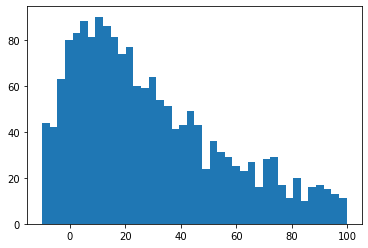

In [51]:
new_data[new_data["direction"] == 1]["last_growth_rate"].describe()

count    3338.000000
mean        0.113565
std        26.127237
min      -770.707000
25%        -0.881750
50%         0.082500
75%         0.559750
max       598.007000
Name: last_growth_rate, dtype: float64

In [70]:
last_growth_rate = new_data[(new_data["direction"] == 1) 
                        & (new_data["last_growth_rate"] > -0.88)
                        & (new_data["last_growth_rate"] < 0.65)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

In [71]:
plt.hist(last_growth_rate, bins=40)

(array([ 16.,  21.,  19.,  15.,  19.,   7.,  20.,  14.,  23.,  12.,  21.,
         23.,  16.,  23.,  24.,  25.,  27.,  25.,  32.,  45.,  50.,  58.,
         70.,  84., 119., 129.,  88.,  84.,  77.,  92.,  69.,  53.,  56.,
         49.,  43.,  48.,  37.,  42.,  38.,  38.]),
 array([-0.878 , -0.8399, -0.8018, -0.7637, -0.7256, -0.6875, -0.6494,
        -0.6113, -0.5732, -0.5351, -0.497 , -0.4589, -0.4208, -0.3827,
        -0.3446, -0.3065, -0.2684, -0.2303, -0.1922, -0.1541, -0.116 ,
        -0.0779, -0.0398, -0.0017,  0.0364,  0.0745,  0.1126,  0.1507,
         0.1888,  0.2269,  0.265 ,  0.3031,  0.3412,  0.3793,  0.4174,
         0.4555,  0.4936,  0.5317,  0.5698,  0.6079,  0.646 ]),
 <a list of 40 Patch objects>)

In [157]:
new_data[new_data["direction"] == -1]["dcf_to_price"].describe()

count    1.929000e+03
mean    -6.207909e+10
std      2.747693e+12
min     -1.206763e+14
25%     -1.000000e+02
50%     -9.988057e+01
75%      1.750000e+02
max      8.260625e+11
Name: dcf_to_price, dtype: float64

(array([  4.,   2.,   5.,   5.,   8.,   5.,   6.,  13.,  23., 868.,  69.,
         18.,  13.,  11.,   8.,   7.,   9.,   8.,   7.,  23.,  42.,  67.,
         60.,  57.,  38.,  43.,  33.,  19.,  23.,  17.,  17.,  19.,  17.,
         11.,   4.,   8.,   9.,  12.,   4.,   7.]),
 array([-1.98409175e+02, -1.88481223e+02, -1.78553270e+02, -1.68625318e+02,
        -1.58697365e+02, -1.48769413e+02, -1.38841461e+02, -1.28913508e+02,
        -1.18985556e+02, -1.09057604e+02, -9.91296512e+01, -8.92016988e+01,
        -7.92737464e+01, -6.93457941e+01, -5.94178417e+01, -4.94898893e+01,
        -3.95619369e+01, -2.96339845e+01, -1.97060322e+01, -9.77807978e+00,
         1.49872599e-01,  1.00778250e+01,  2.00057774e+01,  2.99337297e+01,
         3.98616821e+01,  4.97896345e+01,  5.97175869e+01,  6.96455393e+01,
         7.95734916e+01,  8.95014440e+01,  9.94293964e+01,  1.09357349e+02,
         1.19285301e+02,  1.29213254e+02,  1.39141206e+02,  1.49069158e+02,
         1.58997111e+02,  1.68925063e+02, 

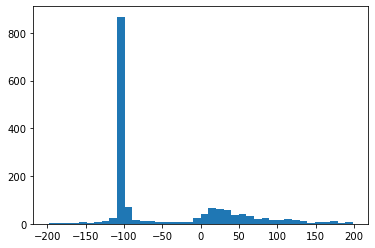

In [78]:
dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["dcf_to_price"] > -200)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

plt.hist(dcf_to_price, bins=40)

In [158]:
new_data[new_data["direction"] == -1]["market_dcf_to_price"].describe()

count      1929.000000
mean        327.934292
std       22074.993532
min     -326043.779603
25%        -119.769357
50%          23.523622
75%         145.325779
max      354527.272727
Name: market_dcf_to_price, dtype: float64

In [80]:
market_dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

(array([  4.,   4.,   5.,   6.,   3.,   7.,   4.,  12.,   7.,   5.,   7.,
         11.,   9.,   5.,   6.,  17.,  23.,  30.,  55., 139., 209., 174.,
        159., 134.,  98.,  69.,  40.,  34.,  43.,  45.,  32.,  30.,  21.,
         22.,  16.,  19.,  15.,  19.,  17.,  12.]),
 array([-199.27360775, -189.29176755, -179.30992736, -169.32808717,
        -159.34624697, -149.36440678, -139.38256659, -129.40072639,
        -119.4188862 , -109.437046  ,  -99.45520581,  -89.47336562,
         -79.49152542,  -69.50968523,  -59.52784504,  -49.54600484,
         -39.56416465,  -29.58232446,  -19.60048426,   -9.61864407,
           0.36319613,   10.34503632,   20.32687651,   30.30871671,
          40.2905569 ,   50.27239709,   60.25423729,   70.23607748,
          80.21791768,   90.19975787,  100.18159806,  110.16343826,
         120.14527845,  130.12711864,  140.10895884,  150.09079903,
         160.07263923,  170.05447942,  180.03631961,  190.01815981,
         200.        ]),
 <a list of 40 Patch 

In [159]:
new_data[new_data["direction"] == -1]["last_growth_rate"].describe()

count    2063.000000
mean       -1.605766
std        28.898125
min      -578.327000
25%        -1.054000
50%         0.062000
75%         0.596000
max       190.918000
Name: last_growth_rate, dtype: float64

In [82]:
last_growth_rate = new_data[(new_data["direction"] == -1) 
                        & (new_data["last_growth_rate"] > -1)
                        & (new_data["last_growth_rate"] < 1)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

plt.hist(market_dcf_to_price, bins=40)

(array([  3.,   4.,   4.,   2.,   6.,   9.,   7.,   4.,   4.,   3.,   5.,
          9.,   8.,   6.,  11.,  12.,  11.,  35.,  55., 200., 302., 304.,
        245., 176., 146., 116.,  76.,  82.,  59.,  46.,  35.,  32.,  28.,
         19.,  25.,  18.,  16.,  18.,  14.,  18.]),
 array([-1.99993032e+02, -1.89993206e+02, -1.79993380e+02, -1.69993554e+02,
        -1.59993729e+02, -1.49993903e+02, -1.39994077e+02, -1.29994251e+02,
        -1.19994425e+02, -1.09994600e+02, -9.99947738e+01, -8.99949480e+01,
        -7.99951222e+01, -6.99952964e+01, -5.99954706e+01, -4.99956448e+01,
        -3.99958190e+01, -2.99959932e+01, -1.99961675e+01, -9.99634166e+00,
         3.48413220e-03,  1.00033099e+01,  2.00031357e+01,  3.00029615e+01,
         4.00027873e+01,  5.00026131e+01,  6.00024389e+01,  7.00022647e+01,
         8.00020905e+01,  9.00019163e+01,  1.00001742e+02,  1.10001568e+02,
         1.20001394e+02,  1.30001219e+02,  1.40001045e+02,  1.50000871e+02,
         1.60000697e+02,  1.70000523e+02, 

In [88]:
import numpy as np
import pandas as pd

In [89]:
csv_file = "./make_dcf_model_0605.csv"
data = pd.read_csv(csv_file, header=0, index_col=0)

In [90]:
data["price_change_perf"] = (data["current_price"] - data["last_price"]) * 100 / data["last_price"]

In [146]:


features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = data[features].values
Y = (data.loc[:, 'price_change_perf'].values) 

In [147]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [148]:
# !pip3 install sklearn

In [149]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [150]:
# !pip3 install matplotlib

C:\Program Files\Python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\Python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([188., 490., 773., 452., 141.,  41.,  25.,  15.,   9.,   9.,   1.,
          1.,   2.,   2.,   2.,   0.,   1.,   1.,   0.,   2.]),
 array([-100.   ,  -59.375,  -18.75 ,   21.875,   62.5  ,  103.125,
         143.75 ,  184.375,  225.   ,  265.625,  306.25 ,  346.875,
         387.5  ,  428.125,  468.75 ,  509.375,  550.   ,  590.625,
         631.25 ,  671.875,  712.5  ]),
 <a list of 20 Patch objects>)

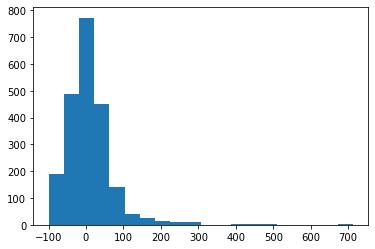

In [151]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins=20)

In [152]:
filtered_outliner = data[(data["price_change_perf"] < 100) & (data["price_change_perf"] > -100) ]

In [153]:
features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([ 14.,  15.,  23.,  16.,  29.,  39.,  21.,  39.,  37.,  47.,  51.,
         58.,  65.,  60.,  74.,  75.,  89.,  81., 114., 101.,  74.,  96.,
         98.,  88.,  86.,  72.,  62.,  60.,  39.,  50.,  34.,  33.,  27.,
         36.,  23.,  27.,  17.,  22.,  19.,  17.]),
 array([-98.73412699, -93.78222118, -88.83031538, -83.87840957,
        -78.92650376, -73.97459796, -69.02269215, -64.07078634,
        -59.11888054, -54.16697473, -49.21506893, -44.26316312,
        -39.31125731, -34.35935151, -29.4074457 , -24.45553989,
        -19.50363409, -14.55172828,  -9.59982248,  -4.64791667,
          0.30398914,   5.25589494,  10.20780075,  15.15970656,
         20.11161236,  25.06351817,  30.01542397,  34.96732978,
         39.91923559,  44.87114139,  49.8230472 ,  54.77495301,
         59.72685881,  64.67876462,  69.63067043,  74.58257623,
         79.53448204,  84.48638784,  89.43829365,  94.39019946,
         99.34210526]),
 <a list of 40 Patch objects>)

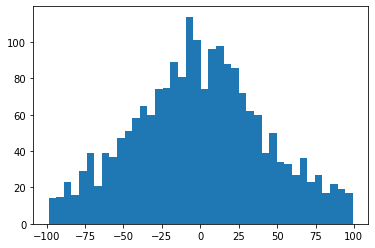

In [154]:
plt.hist(y_test, bins=40)

(array([ 23.,  39.,  51.,  71.,  69.,  91.,  96., 112., 119., 130., 141.,
        158., 208., 192., 237., 238., 268., 266., 324., 293., 292., 284.,
        275., 269., 272., 234., 202., 192., 145., 134., 110., 101., 103.,
         86.,  81.,  60.,  55.,  39.,  42.,  43.]),
 array([-100.        ,  -95.00668896,  -90.01337793,  -85.02006689,
         -80.02675585,  -75.03344482,  -70.04013378,  -65.04682274,
         -60.05351171,  -55.06020067,  -50.06688963,  -45.0735786 ,
         -40.08026756,  -35.08695652,  -30.09364548,  -25.10033445,
         -20.10702341,  -15.11371237,  -10.12040134,   -5.1270903 ,
          -0.13377926,    4.85953177,    9.85284281,   14.84615385,
          19.83946488,   24.83277592,   29.82608696,   34.81939799,
          39.81270903,   44.80602007,   49.7993311 ,   54.79264214,
          59.78595318,   64.77926421,   69.77257525,   74.76588629,
          79.75919732,   84.75250836,   89.7458194 ,   94.73913043,
          99.73244147]),
 <a list of 40 Patch 

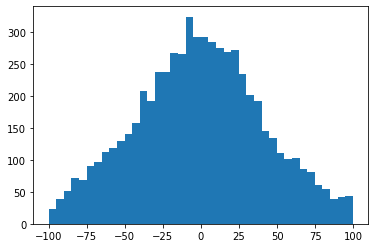

In [155]:
plt.hist(Y, bins=40)

In [156]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
y_pred = model.predict(X_test)

(array([  3.,   0.,   0.,   3.,   1.,   3.,   6.,   5.,   4.,   7.,  11.,
         16.,  15.,  38.,  43.,  54.,  61.,  89., 132., 135., 164., 177.,
        180., 191., 188., 162., 124.,  85.,  57.,  37.,  15.,   7.,   5.,
          6.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([-101.89742  ,  -97.29676  ,  -92.6961   ,  -88.095436 ,
         -83.494774 ,  -78.89411  ,  -74.29345  ,  -69.69279  ,
         -65.092125 ,  -60.49146  ,  -55.890797 ,  -51.290134 ,
         -46.689472 ,  -42.08881  ,  -37.488148 ,  -32.88748  ,
         -28.286821 ,  -23.68616  ,  -19.085495 ,  -14.484833 ,
          -9.884171 ,   -5.283508 ,   -0.6828453,    3.9178174,
           8.51848  ,   13.119143 ,   17.719805 ,   22.320467 ,
          26.921131 ,   31.521793 ,   36.122456 ,   40.723118 ,
          45.32378  ,   49.924442 ,   54.525105 ,   59.12577  ,
          63.726433 ,   68.327095 ,   72.92776  ,   77.52842  ,
          82.12908  ], dtype=float32),
 <a list of 40 Patch objects>)

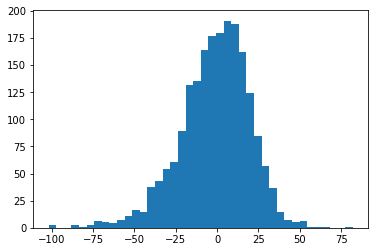

In [158]:
plt.hist(y_pred, bins=40)

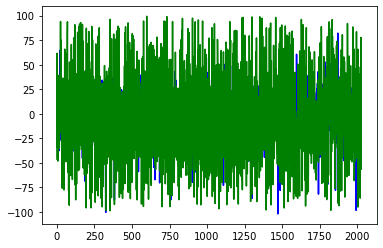

In [159]:
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.show()

In [162]:
accuracy = accuracy_score(y_test >= 30, y_pred >= 30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.05%


In [163]:
accuracy = accuracy_score(y_test >= 20, y_pred >= 20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.63%


In [164]:
accuracy = accuracy_score(y_test < -30, y_pred < -30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.70%


In [165]:
accuracy = accuracy_score(y_test < -20, y_pred < -20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.65%


In [114]:
data[data["price_change_perf"] > 30]["last_growth_rate"].describe()

count    1728.000000
mean        0.163597
std        25.849220
min      -579.996000
25%        -0.921250
50%         0.086000
75%         0.565250
max       598.007000
Name: last_growth_rate, dtype: float64

(array([13.,  4.,  8., 11., 16., 11., 10., 12., 12.,  5., 16., 15., 11.,
        14., 18., 19., 32., 31., 36., 43., 61., 70., 65., 50., 59., 50.,
        41., 38., 35., 37., 28., 26., 26., 18., 27., 22., 14., 13.,  7.,
        13.]),
 array([-9.96000e-01, -9.46175e-01, -8.96350e-01, -8.46525e-01,
        -7.96700e-01, -7.46875e-01, -6.97050e-01, -6.47225e-01,
        -5.97400e-01, -5.47575e-01, -4.97750e-01, -4.47925e-01,
        -3.98100e-01, -3.48275e-01, -2.98450e-01, -2.48625e-01,
        -1.98800e-01, -1.48975e-01, -9.91500e-02, -4.93250e-02,
         5.00000e-04,  5.03250e-02,  1.00150e-01,  1.49975e-01,
         1.99800e-01,  2.49625e-01,  2.99450e-01,  3.49275e-01,
         3.99100e-01,  4.48925e-01,  4.98750e-01,  5.48575e-01,
         5.98400e-01,  6.48225e-01,  6.98050e-01,  7.47875e-01,
         7.97700e-01,  8.47525e-01,  8.97350e-01,  9.47175e-01,
         9.97000e-01]),
 <a list of 40 Patch objects>)

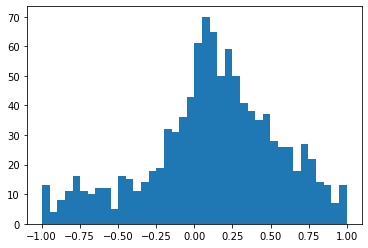

In [117]:
last_growth_rate = data[(data["price_change_perf"] > 30) 
                        & (data["last_growth_rate"] > -1)
                        & (data["last_growth_rate"] < 1)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

plt.hist(last_growth_rate, bins=40)

In [118]:
data[data["price_change_perf"] > 30]["last_market_dcf"].describe()

count      1667.000000
mean        371.713257
std       14756.082986
min      -61811.900000
25%           3.950000
50%          28.300000
75%          75.300000
max      595315.600000
Name: last_market_dcf, dtype: float64

(array([  3.,   2.,   5.,   3.,   5.,   6.,   4.,   6.,   8.,   6.,   6.,
          5.,   2.,  11.,   7.,   9.,  12.,  14.,   9.,  17., 129., 106.,
         94.,  75.,  69.,  71.,  62.,  61.,  51.,  41.,  38.,  29.,  35.,
         34.,  35.,  22.,  19.,  18.,  19.,  15.]),
 array([-98.7  , -93.735, -88.77 , -83.805, -78.84 , -73.875, -68.91 ,
        -63.945, -58.98 , -54.015, -49.05 , -44.085, -39.12 , -34.155,
        -29.19 , -24.225, -19.26 , -14.295,  -9.33 ,  -4.365,   0.6  ,
          5.565,  10.53 ,  15.495,  20.46 ,  25.425,  30.39 ,  35.355,
         40.32 ,  45.285,  50.25 ,  55.215,  60.18 ,  65.145,  70.11 ,
         75.075,  80.04 ,  85.005,  89.97 ,  94.935,  99.9  ]),
 <a list of 40 Patch objects>)

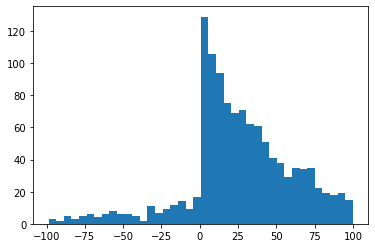

In [120]:
last_market_dcf = data[(data["price_change_perf"] > 30) 
                        & (data["last_market_dcf"] > -100)
                        & (data["last_market_dcf"] < 100)]
last_market_dcf = last_market_dcf.loc[:, 'last_market_dcf'].values

plt.hist(last_market_dcf, bins=40)

In [126]:
data[data["price_change_perf"] > 30]["market_dcf_to_price"].describe()

count    1.667000e+03
mean              inf
std               NaN
min     -8.192561e+05
25%     -6.947451e+00
50%      2.258172e+01
75%      1.082128e+02
max               inf
Name: market_dcf_to_price, dtype: float64

(array([ 2.,  1.,  3.,  0.,  1.,  1.,  1.,  2.,  3.,  1.,  5.,  2.,  5.,
        10., 10., 12., 14., 48., 54., 85., 76., 66., 63., 67., 45., 48.,
        42., 36., 36., 21., 24., 21., 19., 22., 20., 11., 17., 11., 12.,
        12.]),
 array([-91.76954733, -86.98017453, -82.19080173, -77.40142893,
        -72.61205613, -67.82268333, -63.03331053, -58.24393773,
        -53.45456493, -48.66519213, -43.87581933, -39.08644654,
        -34.29707374, -29.50770094, -24.71832814, -19.92895534,
        -15.13958254, -10.35020974,  -5.56083694,  -0.77146414,
          4.01790866,   8.80728146,  13.59665425,  18.38602705,
         23.17539985,  27.96477265,  32.75414545,  37.54351825,
         42.33289105,  47.12226385,  51.91163665,  56.70100945,
         61.49038224,  66.27975504,  71.06912784,  75.85850064,
         80.64787344,  85.43724624,  90.22661904,  95.01599184,
         99.80536464]),
 <a list of 40 Patch objects>)

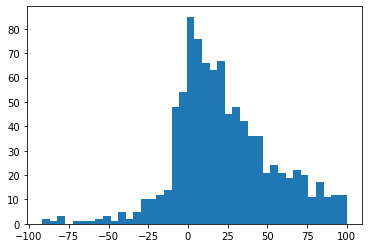

In [127]:
market_dcf_to_price = data[(data["price_change_perf"] > 30) 
                        & (data["market_dcf_to_price"] > -100)
                        & (data["market_dcf_to_price"] < 100)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

['last_growth_rate', 'last_market_dcf', 'last_dcf', 'dcf_to_price', 'market_dcf_to_price']


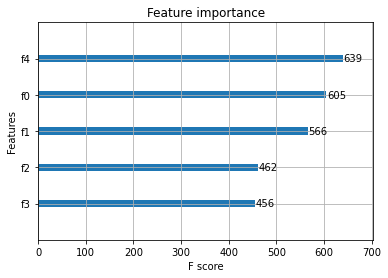

In [125]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
X = data[features].values
Y = data['direction'].values
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
print (features)
pyplot.show()

In [166]:
filtered_outliner = data[(data["price_change_perf"] < 100) & (data["price_change_perf"] > -100) ]
features = ['last_growth_rate', 'last_market_dcf','market_dcf_to_price']
print(filtered_outliner.shape)

(6145, 18)


In [167]:


X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([ 14.,  15.,  23.,  16.,  29.,  39.,  21.,  39.,  37.,  47.,  51.,
         58.,  65.,  60.,  74.,  75.,  89.,  81., 114., 101.,  74.,  96.,
         98.,  88.,  86.,  72.,  62.,  60.,  39.,  50.,  34.,  33.,  27.,
         36.,  23.,  27.,  17.,  22.,  19.,  17.]),
 array([-98.73412699, -93.78222118, -88.83031538, -83.87840957,
        -78.92650376, -73.97459796, -69.02269215, -64.07078634,
        -59.11888054, -54.16697473, -49.21506893, -44.26316312,
        -39.31125731, -34.35935151, -29.4074457 , -24.45553989,
        -19.50363409, -14.55172828,  -9.59982248,  -4.64791667,
          0.30398914,   5.25589494,  10.20780075,  15.15970656,
         20.11161236,  25.06351817,  30.01542397,  34.96732978,
         39.91923559,  44.87114139,  49.8230472 ,  54.77495301,
         59.72685881,  64.67876462,  69.63067043,  74.58257623,
         79.53448204,  84.48638784,  89.43829365,  94.39019946,
         99.34210526]),
 <a list of 40 Patch objects>)

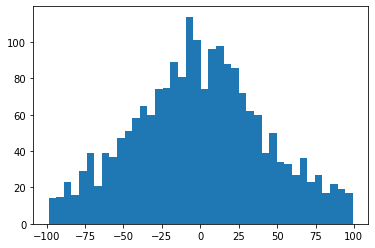

In [168]:
plt.hist(y_test, bins=40)

(array([ 15.,  22.,  32.,  51.,  40.,  62.,  68.,  72.,  84.,  82.,  90.,
         98., 149., 133., 161., 164., 178., 188., 209., 193., 211., 186.,
        175., 182., 186., 160., 140., 131., 106.,  84.,  76.,  68.,  76.,
         49.,  58.,  33.,  37.,  18.,  21.,  29.]),
 array([-100.        ,  -95.00668896,  -90.01337793,  -85.02006689,
         -80.02675585,  -75.03344482,  -70.04013378,  -65.04682274,
         -60.05351171,  -55.06020067,  -50.06688963,  -45.0735786 ,
         -40.08026756,  -35.08695652,  -30.09364548,  -25.10033445,
         -20.10702341,  -15.11371237,  -10.12040134,   -5.1270903 ,
          -0.13377926,    4.85953177,    9.85284281,   14.84615385,
          19.83946488,   24.83277592,   29.82608696,   34.81939799,
          39.81270903,   44.80602007,   49.7993311 ,   54.79264214,
          59.78595318,   64.77926421,   69.77257525,   74.76588629,
          79.75919732,   84.75250836,   89.7458194 ,   94.73913043,
          99.73244147]),
 <a list of 40 Patch 

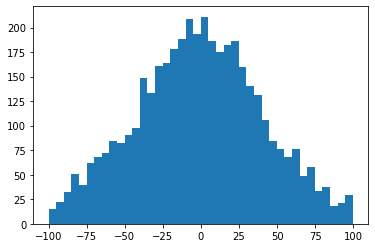

In [169]:
plt.hist(y_train, bins=40)

In [170]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
y_pred = model.predict(X_test)

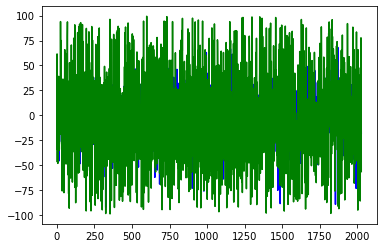

In [172]:
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.show()

In [173]:
accuracy = accuracy_score(y_test >= 30, y_pred >= 30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.05%


In [175]:
accuracy = accuracy_score(y_test >= 20, y_pred >= 20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.38%


In [174]:
accuracy = accuracy_score(y_test >= -30, y_pred >= -30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.41%


In [176]:
accuracy = accuracy_score(y_test >= -20, y_pred >= -20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.67%


In [86]:
new_data.to_csv("make_dcf_model_0605.csv")

In [ ]:
!python -m nbconvert --to html DSF_Model_stats_model_5_years.ipynb

[NbConvertApp] Converting notebook DSF_Model_stats_model_5_years.ipynb to html
[NbConvertApp] Writing 575449 bytes to DSF_Model_stats_model_5_years.html
